In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = "retina"

**The MC update**
$$
    V(S_t) = V(S_t) + \alpha[\overbrace{G_t}^\text{MC target} - V(S_t)]
$$

**The TD update**
$$
    V(S_t) = V(S_t) + \alpha[\overbrace{R_{t+1} + \gamma V(S_{t+1})}^{\text{TD target}} - V(S_t)]
$$

## Markov reward process (MRP)
An MRP is a Markov decision process without actions —
we do not distinguish between dynamics of the enviroment and the dynamics based on actions.

In [37]:
n_states = 5 + 1 # total state plus terminal state
states = np.arange(n_states)
mrp = np.zeros((n_states, n_states))
mrp[0, 0] = 1.0

for i in range(1, n_states):
    iprev = i - 1
    inext = (i + 1) % n_states
    mrp[i, [i - 1, inext]] = 1/2

mrp

array([[1. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5],
       [0.5, 0. , 0. , 0. , 0.5, 0. ]])

In [38]:
def sample_run(s):
    s_hist = [s]
    r_hist = []
    r = 0
    while s != 0:
        snext = np.random.choice(states, p=mrp[s])
        r += 1 if (s == n_states - 1) and (snext == 0) else 0
        s = snext
        s_hist.append(s)
        r_hist.append(r)
    return s_hist, r_hist

In [48]:
r = 0
alpha = 0.1
gamma = 1.0

n_sims = 100
value_td = np.zeros(n_states)
value_td_hist = np.zeros((n_sims, n_states))

for n in range(n_sims):
    s = 3
    r = 0
    while s != 0:
        snext = np.random.choice(states, p=mrp[s])
        r += 1 if (s == n_states - 1) and (snext == 0) else 0
        
        target = r + gamma * value_td[snext]
        value_td[s] = value_td[s] + alpha * (target - value_td[s])
        value_td_hist[n] = value_td
        s = snext

In [ ]:
p(r = 1 | E)
= p(r = 1, move = right, E) + p(r = 1, move = left | E)
= p(move = right | E) * p(r = 1 | A, E)
+ p(move = left | E) * p(r = 1 | D)
= 0.5 * 1 + 0.5 * p(r = 1 | D, E) # p(r = 1 | D)

p(r = 1 | D)
= pr(r = 1, move = right | D) + p(r = 1, move = left| D)
= p(move = right | D) * p(r = 1, E)


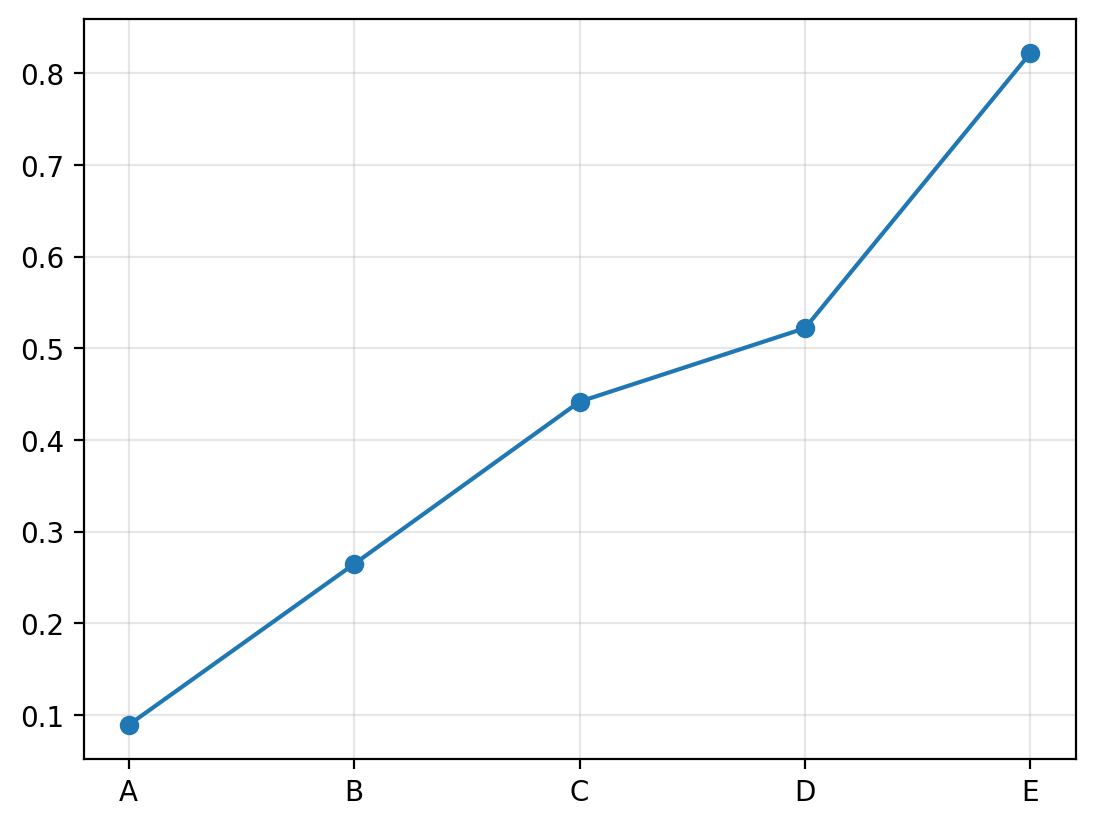

In [65]:
plt.plot(value_td[1:], marker="o")
labels = "A B C D E".split()
plt.xticks(states[:-1], labels=labels)
plt.grid(alpha=0.3);

In [50]:
5 / 6

0.8333333333333334

In [31]:
value_td_hist.shape

(1000, 5)